In [1]:
import pandas as pd

In [2]:
import yfinance as yf
import datetime as dt

In [3]:
start = dt.datetime(2021,6,1)
end = dt.datetime(2022,1,28)
stk_data = yf.download('TATACOFFEE.NS',start=start,end=end)

[*********************100%%**********************]  1 of 1 completed


In [7]:
stk_data=stk_data[["Open","High","Low","Close"]]
stk_data
#stk_data.to_csv("Tatacoffee13_21.csv")

,Open,High,Low,Close
Date,,,,
2021-06-01,180.000000,181.350006,172.649994,174.250000
2021-06-02,173.550003,175.649994,172.050003,174.000000
2021-06-03,176.899994,178.699997,175.600006,176.699997
2021-06-04,177.899994,177.899994,173.750000,174.350006
2021-06-07,176.399994,176.649994,173.000000,174.350006
...,...,...,...,...
2022-01-20,219.500000,224.399994,218.399994,219.699997
2022-01-21,217.699997,224.399994,216.699997,219.550003
2022-01-24,218.000000,220.000000,205.199997,208.000000


In [8]:
column="Close"

In [9]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[[column]])
print("Len:",data1.shape)

Len: (166, 1)


In [10]:
training_size = round(len(data1 ) * 0.95)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

158
X_train length: (158, 1)
X_test length: (8, 1)
y_train length: (158, 1)
y_test length: (8, 1)


In [37]:
import warnings
warnings.filterwarnings("ignore")

In [39]:
from sklearn.metrics import mean_squared_error
trends=['n','t','c','ct']
#orders=[(0,0,1),(0,0,2)]
from statsmodels.tsa.arima.model import ARIMA
for td in trends:
        
        #print(td)
        #trendslist.append(td)
    model = ARIMA(X_train, order=(0,0,10),trend=td,)
    model_fit = model.fit()
        # make prediction
    y_pred= model_fit.predict(len(X_train), len(data1)-1)
        #print(y_pred)
    from sklearn.metrics import r2_score
    mse=mean_squared_error(y_test,y_pred,squared=False)
    from stockFunctions import rmsemape
    print("Trend={}".format(td))
    rmsemape(y_test,y_pred)
    print("************")

Trend=n
RMSE-Testset: 0.3309207987868374
maPe-Testset: 0.4507215536560035
************
Trend=t
RMSE-Testset: 0.193970499943663
maPe-Testset: 0.25416531652440627
************
Trend=c
RMSE-Testset: 0.08460109306350876
maPe-Testset: 0.10743364364700875
************
Trend=ct
RMSE-Testset: 0.13341364741839323
maPe-Testset: 0.16939788608392806
************


In [17]:
len(y_pred)

8

In [18]:
#i=1
td="c"
model = ARIMA(X_train, order=(0,0,30),trend=td)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(X_train), len(data1)-1)
#print(y_pred)
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_pred,squared=False)
from stockFunctions import rmsemape
print("Trend={}".format(td))
rmsemape(y_test,y_pred)
print("************")

Trend=c
RMSE-Testset: 0.07966635591453324
maPe-Testset: 0.09966366152963753
************


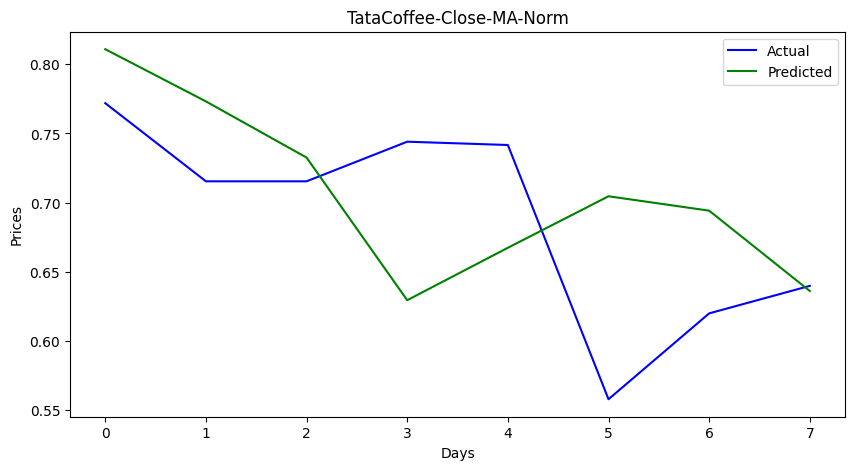

In [19]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","TataCoffee-Close-MA-Norm","Days","Prices")

In [20]:
len(data1)

166

In [21]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [22]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

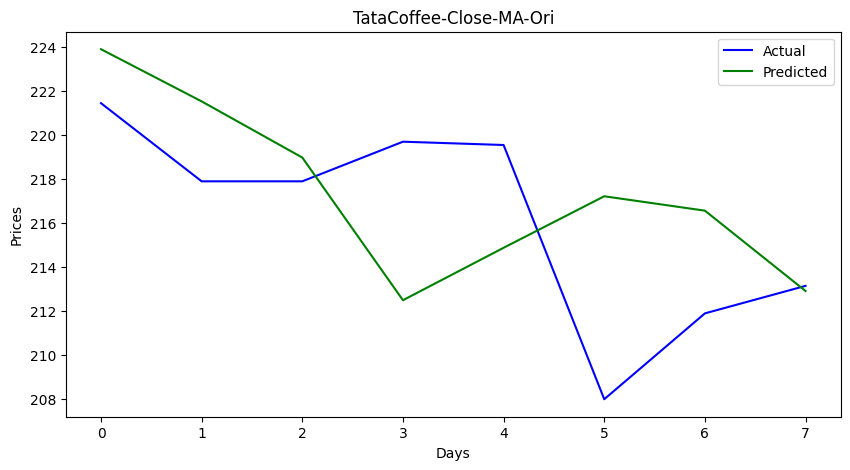

In [23]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-Close-MA-Ori","Days","Prices")

In [24]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 5.011014516391408
maPe-Testset: 0.01927314404092116


In [27]:
len(data1)

166

In [30]:
forecast=model_fit.predict(len(data1), len(data1)+2)

In [31]:
forecast

array([0.67591786, 0.69551141, 0.67610205])

In [32]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [42]:
round(forecast_stock_price_test_oriF)

,Closefore
0,215.415234
1,216.647668
2,215.426819


In [ ]:
forecast_stock_price_test_oriF.to_csv("CloseMA.csv",index=False)